In [2]:
import pandas as pd
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
df=fetch_california_housing()


In [6]:
dataset=pd.DataFrame(df.data)

In [7]:
dataset=pd.DataFrame(df.data, columns=df.feature_names) 

In [8]:
X=dataset 
y=df.target

In [9]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [34]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [38]:
X_test

array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
         0.19154848,  0.28682423],
       [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
        -0.23956945,  0.06239148],
       [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
         1.0069237 , -1.42385206],
       ...,
       [-0.02167353, -1.07613702,  0.40141018, ...,  0.03744641,
         1.43335556, -0.90516304],
       [ 0.27275111, -1.47295261,  0.29311784, ...,  0.0519346 ,
        -0.73160623,  1.09478213],
       [-0.59570436,  1.78093523, -0.64482761, ..., -0.06665881,
         0.99755157, -1.43881424]], shape=(6812, 8))

In [39]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=10)

In [41]:
np.mean(mse)

np.float64(-0.5221889833984605)

In [42]:
reg_pred = regression.predict(X_test)
print("Predictions on X_test:", reg_pred)

Predictions on X_test: [0.72563462 1.76650223 2.70545812 ... 1.25803135 1.66673014 2.25826279]


In [43]:
print(type(reg_pred), len(reg_pred))

<class 'numpy.ndarray'> 6812


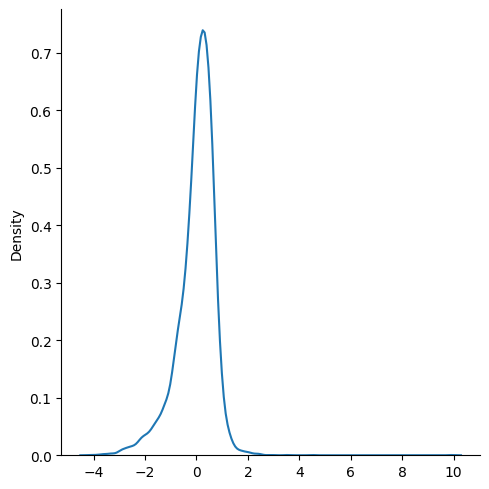

In [44]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2 = r2_score(reg_pred,y_test)

In [47]:
r2

0.3395742960386745